In [4]:
import pandas as pd
# Read Data
url = "https://raw.githubusercontent.com/eason280711/ml/main/Data/student_study_hours_vs_grades.csv"
df = pd.read_csv(url)

print(df)

x = df["Study Hours"]
y = df["Grade"]

    Study Hours  Grade
0          5.64     58
1          1.56     18
2          3.35     38
3          3.21     30
4          7.34     76
..          ...    ...
95         5.80     59
96         4.09     43
97         9.13     87
98         1.95     24
99         4.95     46

[100 rows x 2 columns]


In [5]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import fontManager

# Matplotlib Font Setting

#!pip install wget
#import wget
#wget.download("https://github.com/eason280711/ml/raw/main/Font/ChineseFont.ttf")

fontManager.addfont("../Font/ChineseFont.ttf")
matplotlib.rc('font', family="ChineseFont")

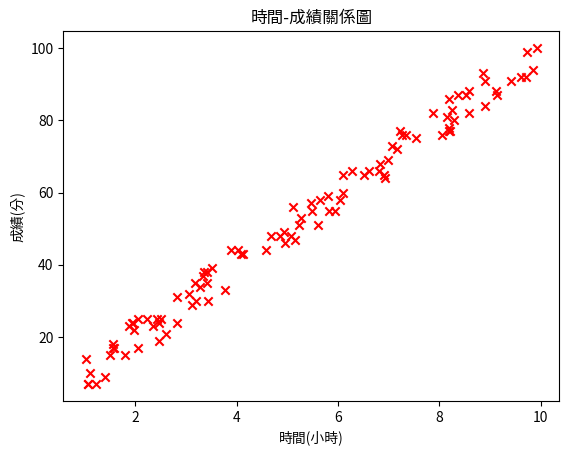

In [13]:
# Show Data
plt.scatter(x, y, marker="x", color="red")
plt.title("時間-成績關係圖")
plt.xlabel("時間(小時)")
plt.ylabel("成績(分)")
plt.show()

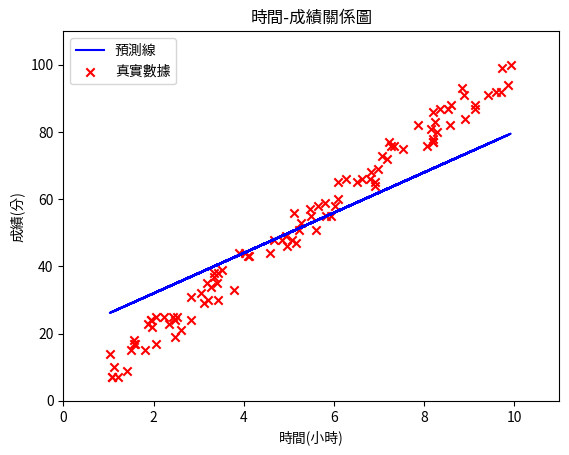

In [28]:
# Linear Regression: y = wx + b
w = 6
b = 20

y_pred = x*w + b

plt.plot(x, y_pred, color="blue", label="預測線")
plt.scatter(x, y, marker="x", color="red", label="真實數據")
plt.title("時間-成績關係圖")
plt.xlabel("時間(小時)")
plt.ylabel("成績(分)")
plt.xlim([0, 11])
plt.ylim([0, 110])
plt.legend()
plt.show()

In [21]:
import numpy as np

# Cost Function
def cost_function(x, y, w, b):
    n = len(x)
    return np.sum((y - (w*x + b))**2) / n

In [34]:
# Calculate cost for a range of w values (b fixed)
b_fixed = 10
w_values = np.arange(-50, 51)
costs_w = [cost_function(x, y, w, b_fixed) for w in w_values]

# Find minimum cost and its corresponding w
min_cost_w = min(costs_w)
min_w = w_values[costs_w.index(min_cost_w)]

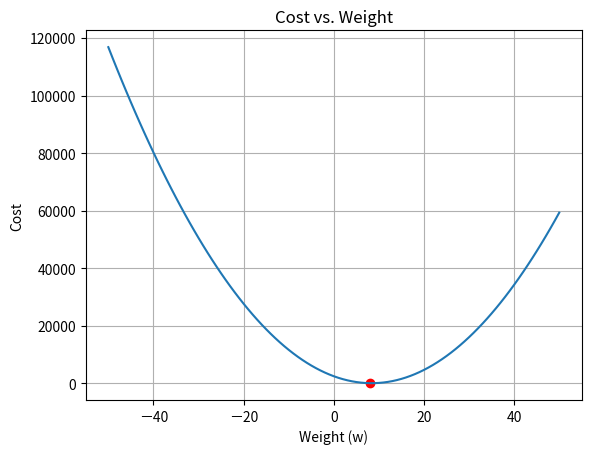

In [38]:
# Plot cost vs w (b fixed)
plt.plot(w_values, costs_w)
plt.scatter(min_w, min_cost_w, color='red')
plt.title('Cost vs. Weight')
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [56]:
# Calculate cost for a range of w and b values
w_values = np.arange(-50, 51)
b_values = np.arange(-50, 51)
costs_wb = np.zeros((len(w_values), len(b_values)))

for i, w in enumerate(w_values):
    for j, b in enumerate(b_values):
        costs_wb[i, j] = cost_function(x, y, w, b)

# Find minimum cost and its corresponding w and b
min_cost_wb = np.min(costs_wb)
min_wb_index = np.unravel_index(np.argmin(costs_wb), costs_wb.shape)
min_w, min_b = w_values[min_wb_index[0]], b_values[min_wb_index[1]]

<IPython.core.display.Javascript object>


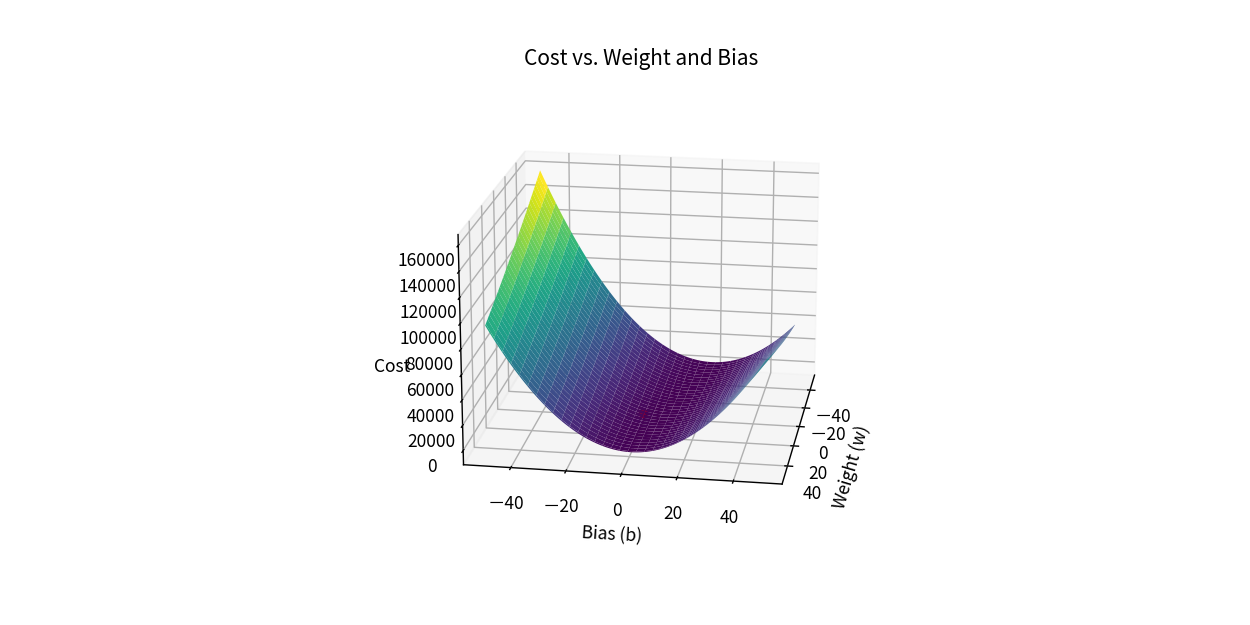

In [57]:
%matplotlib notebook
# Plot cost vs w and b
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
w_values, b_values = np.meshgrid(w_values, b_values)
ax.plot_surface(w_values, b_values, costs_wb, cmap='viridis')
ax.scatter(min_w, min_b, min_cost_wb, color='r')
ax.set_title('Cost vs. Weight and Bias')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost')
plt.show()